<a href="https://colab.research.google.com/github/virajvaidya/PortfolioOptimisation/blob/main/PortfolioOptASX20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
!pip install yfinance

In [ ]:
!pip install plotly

In [ ]:
import requests
import yfinance             as yf
import pandas               as pd
import numpy                as np
import datetime             as dt
import matplotlib.pyplot    as plt
import seaborn              as sns
import plotly.express       as px
import plotly.graph_objects as go


from plotly.subplots            import make_subplots
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt                    import risk_models
from pypfopt                    import expected_returns
from scipy.stats                import norm
from pypfopt.risk_models        import risk_matrix

In [ ]:
asxlist   = ['ALL', 'ANZ', 'APT', 'BHP','CBA','CSL','FMG','GMG','MQG','NAB','NCM','REA','RIO','TCL', 'TLS', 'WBC','WES','WOW','WPL','XRO']
asx20     = [i +'.AX' for i in asxlist]
asx20

In [ ]:
df= yf.download(asx20)

In [ ]:
Close=df.Close

In [ ]:
Close.tail()

,ALL.AX,ANZ.AX,APT.AX,BHP.AX,CBA.AX,CSL.AX,FMG.AX,GMG.AX,MQG.AX,NAB.AX,NCM.AX,REA.AX,RIO.AX,TCL.AX,TLS.AX,WBC.AX,WES.AX,WOW.AX,WPL.AX,XRO.AX
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,43.680000,27.040001,94.000000,39.590000,97.239998,296.290009,17.15,24.930000,200.039993,28.040001,23.120001,158.869995,93.820000,13.92,4.01,20.719999,58.869999,40.610001,21.520000,140.039993
2021-12-07,44.520000,27.459999,95.730003,39.950001,97.629997,301.790009,17.41,24.920000,200.380005,28.340000,23.299999,160.699997,94.650002,13.82,4.01,20.950001,59.139999,40.650002,21.940001,143.429993
2021-12-08,45.180000,27.660000,99.790001,40.689999,97.949997,304.350006,17.98,25.280001,202.990005,28.629999,23.520000,168.940002,96.709999,13.98,4.06,21.070000,60.110001,40.810001,22.400000,145.669998
2021-12-09,44.869999,27.610001,100.269997,40.200001,98.160004,304.679993,18.25,25.330000,201.919998,28.690001,23.580000,167.750000,95.800003,13.70,4.05,21.020000,59.540001,40.610001,22.190001,140.990005
2021-12-10,44.669998,27.469999,95.889999,39.959999,97.900002,298.309998,18.10,25.309999,201.960007,28.629999,23.170000,167.960007,95.830002,13.69,4.06,20.850000,59.849998,40.660000,22.030001,141.100006


In [ ]:
Close.describe()

,ALL.AX,ANZ.AX,APT.AX,BHP.AX,CBA.AX,CSL.AX,FMG.AX,GMG.AX,MQG.AX,NAB.AX,NCM.AX,REA.AX,RIO.AX,TCL.AX,TLS.AX,WBC.AX,WES.AX,WOW.AX,WPL.AX,XRO.AX
count,6423.000000,8538.000000,1132.000000,8535.000000,7657.000000,6959.000000,5697.000000,4267.000000,5852.000000,8537.000000,5818.000000,5597.000000,5819.000000,6502.000000,6089.000000,8537.000000,8536.000000,7167.000000,8535.000000,2304.000000
mean,10.380088,17.232206,47.709081,19.297842,43.974547,63.128292,4.333506,11.157205,61.715042,22.240974,19.070677,33.432835,58.455174,6.780490,4.280189,17.261211,19.120206,19.716700,21.646200,46.835938
std,10.420502,9.749724,44.747968,13.744330,26.535371,84.477298,5.042732,8.326500,38.752441,9.570608,10.926205,42.483810,27.196879,3.740656,1.090711,9.943705,13.239522,11.906799,15.319937,41.084198
min,0.657500,2.656012,2.700000,2.295866,5.865721,0.773333,0.004000,0.703826,15.489008,3.925745,1.920975,0.049255,14.758156,1.168074,2.560000,2.721472,1.322599,2.722367,1.272247,4.480000
25%,3.370000,6.315194,11.760000,7.062194,24.119322,6.856667,0.270000,4.575000,31.368929,12.252518,10.300000,1.566309,30.006886,4.021238,3.390000,6.158075,5.975921,6.850467,7.349676,16.950001
50%,5.950000,17.950001,27.005000,14.730000,40.918304,30.820000,3.755000,7.690000,49.043610,24.638218,19.839374,11.730000,59.128849,5.793343,4.080000,17.163153,20.029043,23.350000,19.200001,29.150000
75%,13.875000,26.107501,93.119999,32.760757,70.699997,87.430000,5.500000,17.582525,81.954998,29.469999,27.655000,52.900002,76.680824,9.618618,5.010000,25.516285,28.610166,28.425760,34.853168,63.335001
max,48.639999,37.189999,158.470001,54.060001,110.129997,341.000000,26.299999,33.538666,208.000000,42.655506,43.410000,176.809998,134.399994,16.370001,7.735108,39.620266,66.059998,43.599998,68.515419,155.750000


#Visualising the stock prices for the ASX20 to-date

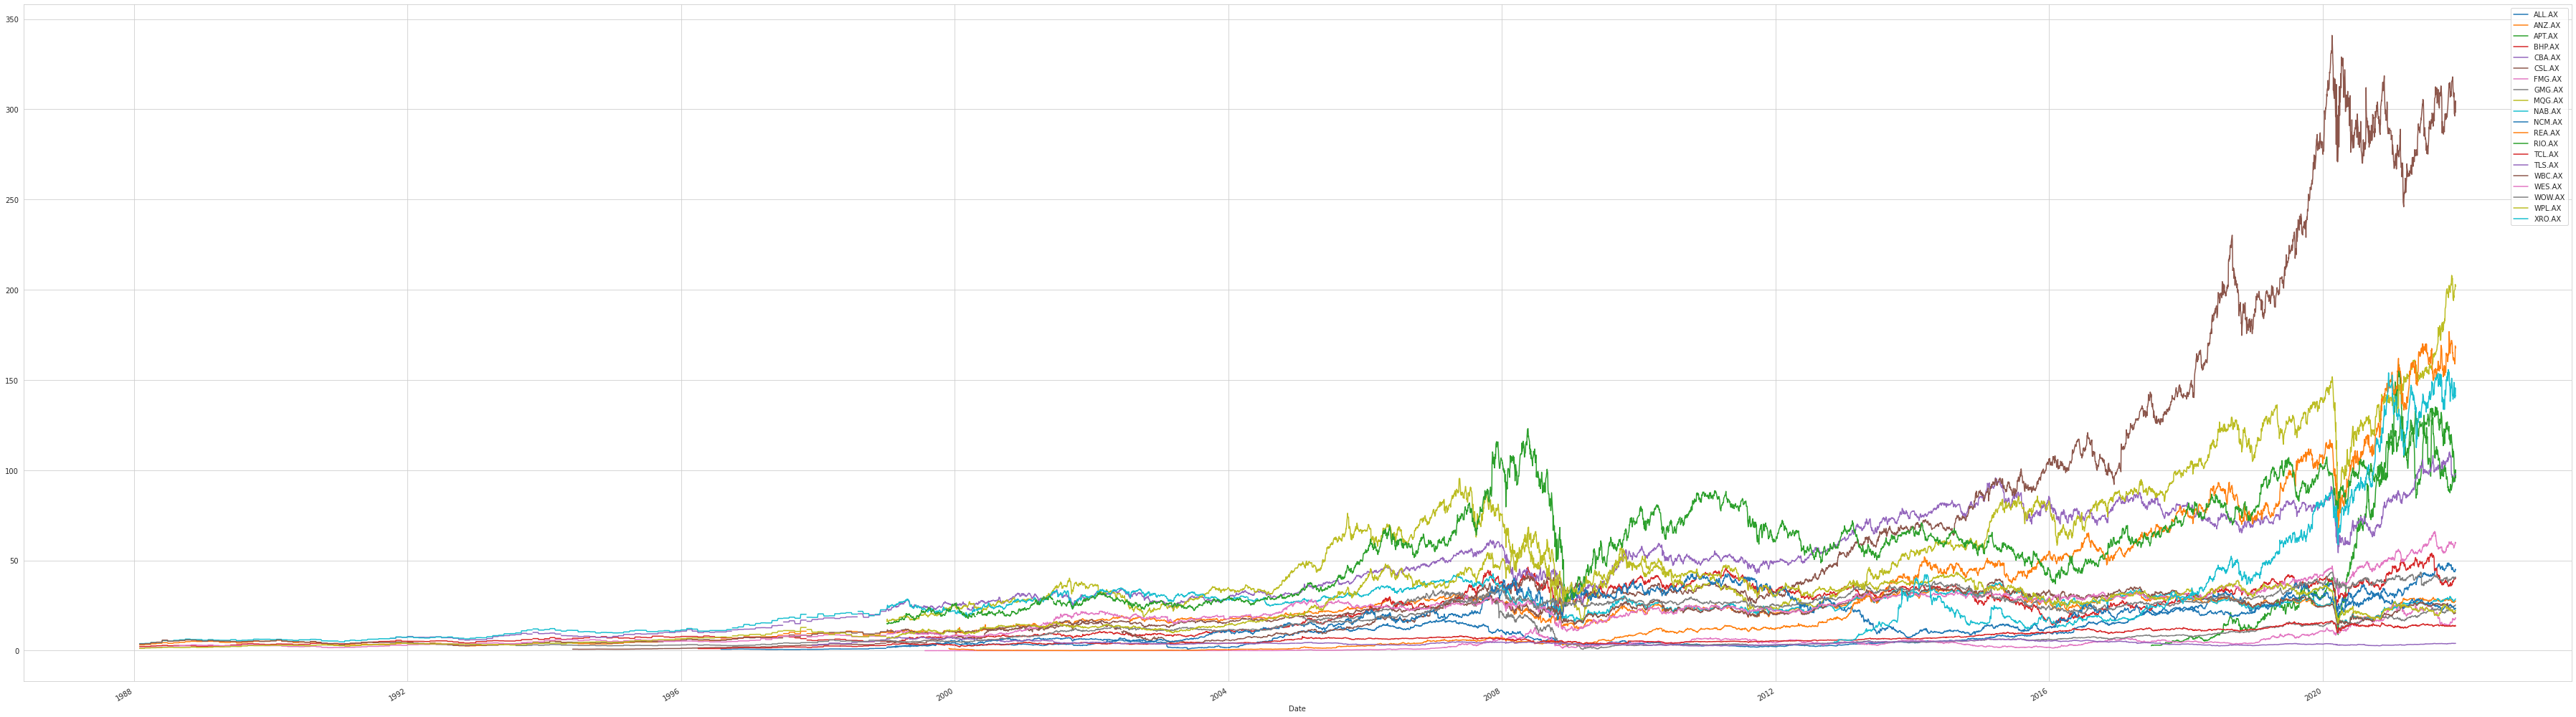

In [ ]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(50, 14))
Close.plot()
plt.tight_layout()

In [ ]:
returns=Close.pct_change()

In [ ]:
returns.tail()

,ALL.AX,ANZ.AX,APT.AX,BHP.AX,CBA.AX,CSL.AX,FMG.AX,GMG.AX,MQG.AX,NAB.AX,NCM.AX,REA.AX,RIO.AX,TCL.AX,TLS.AX,WBC.AX,WES.AX,WOW.AX,WPL.AX,XRO.AX
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,-0.005691,0.000370,-0.043160,-0.015909,0.006521,-0.004636,0.002924,0.014239,0.001703,0.002861,0.015371,-0.011695,-0.017797,0.016058,-0.002488,0.000966,0.020985,0.025764,0.008435,-0.017883
2021-12-07,0.019231,0.015532,0.018404,0.009093,0.004011,0.018563,0.015160,-0.000401,0.001700,0.010699,0.007785,0.011519,0.008847,-0.007184,0.000000,0.011100,0.004586,0.000985,0.019517,0.024207
2021-12-08,0.014825,0.007283,0.042411,0.018523,0.003278,0.008483,0.032740,0.014446,0.013025,0.010233,0.009442,0.051276,0.021764,0.011577,0.012469,0.005728,0.016402,0.003936,0.020966,0.015617
2021-12-09,-0.006861,-0.001808,0.004810,-0.012042,0.002144,0.001084,0.015017,0.001978,-0.005271,0.002096,0.002551,-0.007044,-0.009410,-0.020029,-0.002463,-0.002373,-0.009483,-0.004901,-0.009375,-0.032127
2021-12-10,-0.004457,-0.005071,-0.043682,-0.005970,-0.002649,-0.020907,-0.008219,-0.000790,0.000198,-0.002091,-0.017388,0.001252,0.000313,-0.000730,0.002469,-0.008088,0.005207,0.001231,-0.007210,0.000780


#Visualising the returns of ASX20 securities to-date

ValueError: ignored

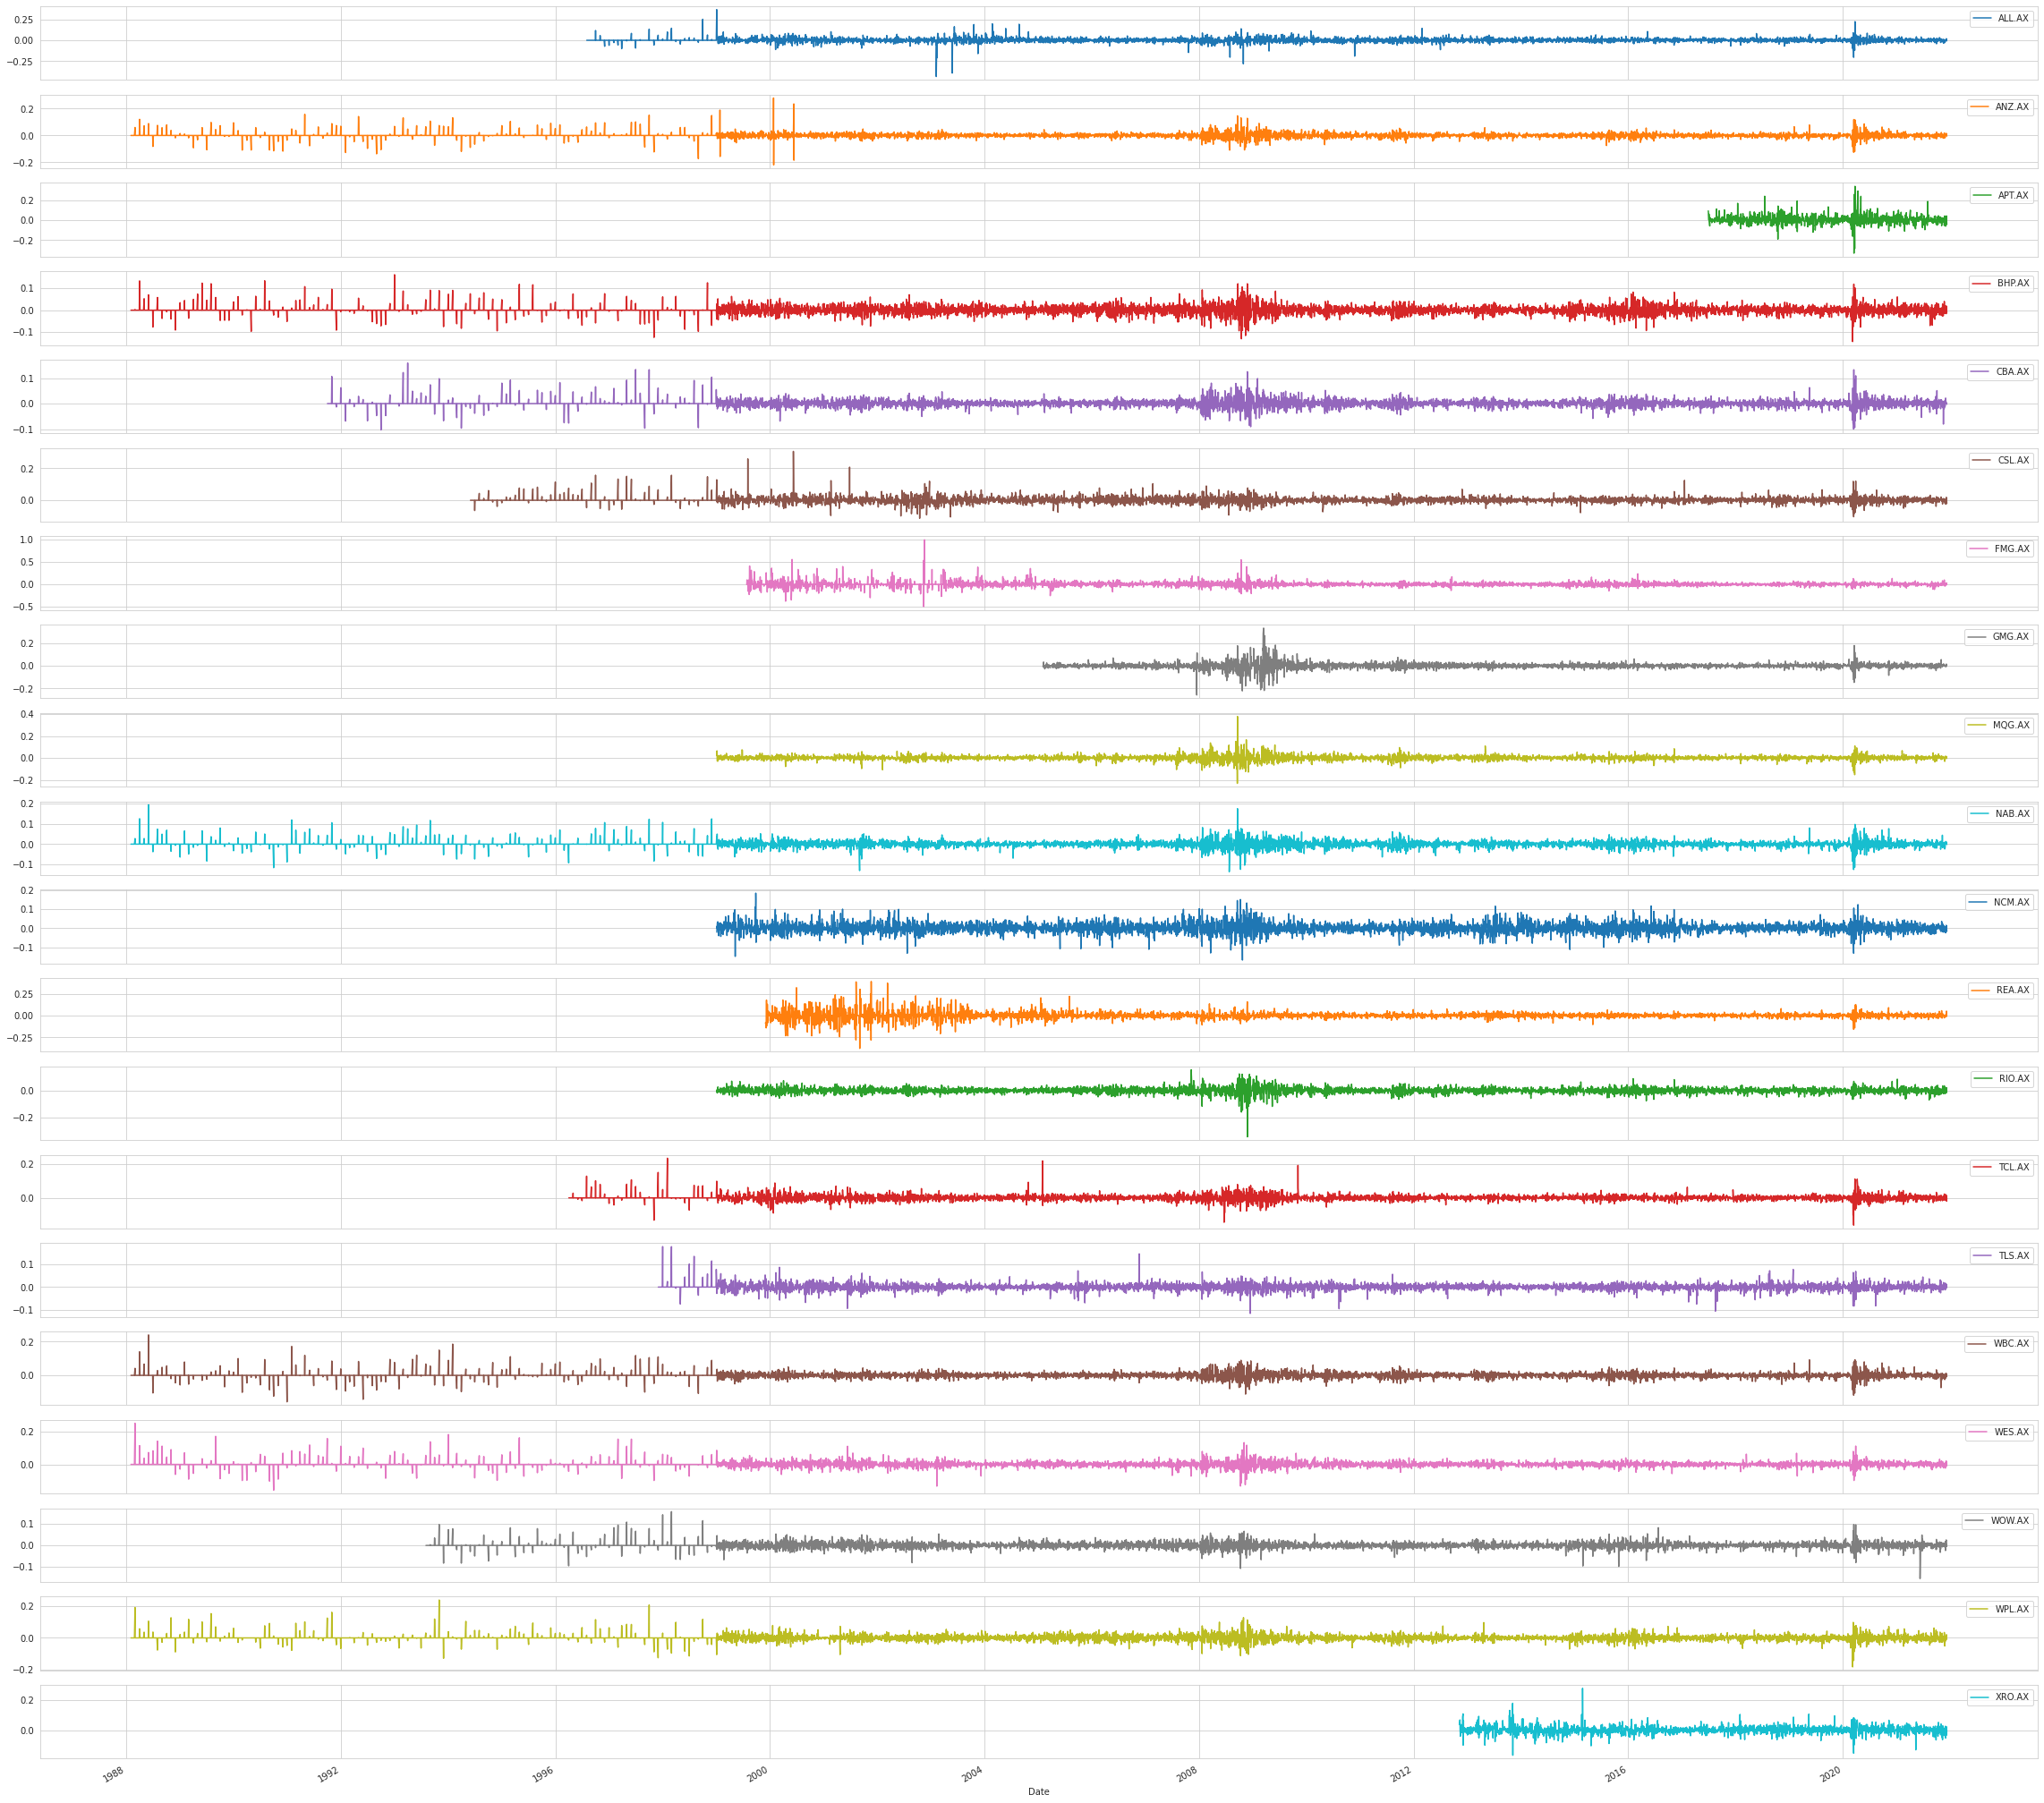

In [ ]:
fig1, ax = returns.plot(subplots=True,figsize=(40,40))
fig1.tight_layout()

In [ ]:
import numpy as np
weights   = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,])   #Allocating equal weights to the stocks in our portfolio
initinv   = 1000000                                                                                                            #Initial investment in AUD

#Covariance Matrix of ASX20

In [ ]:
cov_matrix = returns.cov()
cov_matrix

,ALL.AX,ANZ.AX,APT.AX,BHP.AX,CBA.AX,CSL.AX,FMG.AX,GMG.AX,MQG.AX,NAB.AX,NCM.AX,REA.AX,RIO.AX,TCL.AX,TLS.AX,WBC.AX,WES.AX,WOW.AX,WPL.AX,XRO.AX
ALL.AX,0.000604,0.000102,0.000389,0.000091,0.000091,0.000105,0.000105,0.000154,0.000148,0.000101,0.000034,0.000091,0.000105,0.000092,0.000058,0.000098,0.000089,0.000062,0.000101,0.000119
ANZ.AX,0.000102,0.000274,0.000286,0.000103,0.000151,0.000065,0.000135,0.000162,0.000179,0.000164,0.000031,0.000074,0.000112,0.000072,0.000054,0.000176,0.000088,0.000066,0.000099,0.000087
APT.AX,0.000389,0.000286,0.002120,0.000188,0.000198,0.000166,0.000186,0.000275,0.000353,0.000260,0.000122,0.000364,0.000178,0.000257,0.000086,0.000264,0.000206,0.000089,0.000256,0.000386
BHP.AX,0.000091,0.000103,0.000188,0.000304,0.000088,0.000063,0.000300,0.000126,0.000156,0.000098,0.000120,0.000074,0.000294,0.000052,0.000053,0.000102,0.000092,0.000066,0.000149,0.000081
CBA.AX,0.000091,0.000151,0.000198,0.000088,0.000188,0.000063,0.000126,0.000120,0.000146,0.000141,0.000034,0.000066,0.000097,0.000069,0.000056,0.000144,0.000081,0.000069,0.000088,0.000078
CSL.AX,0.000105,0.000065,0.000166,0.000063,0.000063,0.000325,0.000056,0.000087,0.000094,0.000068,0.000043,0.000081,0.000062,0.000067,0.000059,0.000066,0.000076,0.000061,0.000064,0.000099
FMG.AX,0.000105,0.000135,0.000186,0.000300,0.000126,0.000056,0.002577,0.000167,0.000212,0.000144,0.000193,0.000085,0.000346,0.000059,0.000073,0.000131,0.000128,0.000086,0.000213,0.000094
GMG.AX,0.000154,0.000162,0.000275,0.000126,0.000120,0.000087,0.000167,0.000719,0.000230,0.000153,0.000058,0.000118,0.000133,0.000097,0.000060,0.000126,0.000118,0.000074,0.000104,0.000085
MQG.AX,0.000148,0.000179,0.000353,0.000156,0.000146,0.000094,0.000212,0.000230,0.000436,0.000185,0.000035,0.000100,0.000160,0.000092,0.000060,0.000160,0.000120,0.000073,0.000134,0.000117
NAB.AX,0.000101,0.000164,0.000260,0.000098,0.000141,0.000068,0.000144,0.000153,0.000185,0.000216,0.000033,0.000065,0.000115,0.000071,0.000060,0.000157,0.000090,0.000066,0.000095,0.000080


#Visualising the Covariance Matrix of ASX20

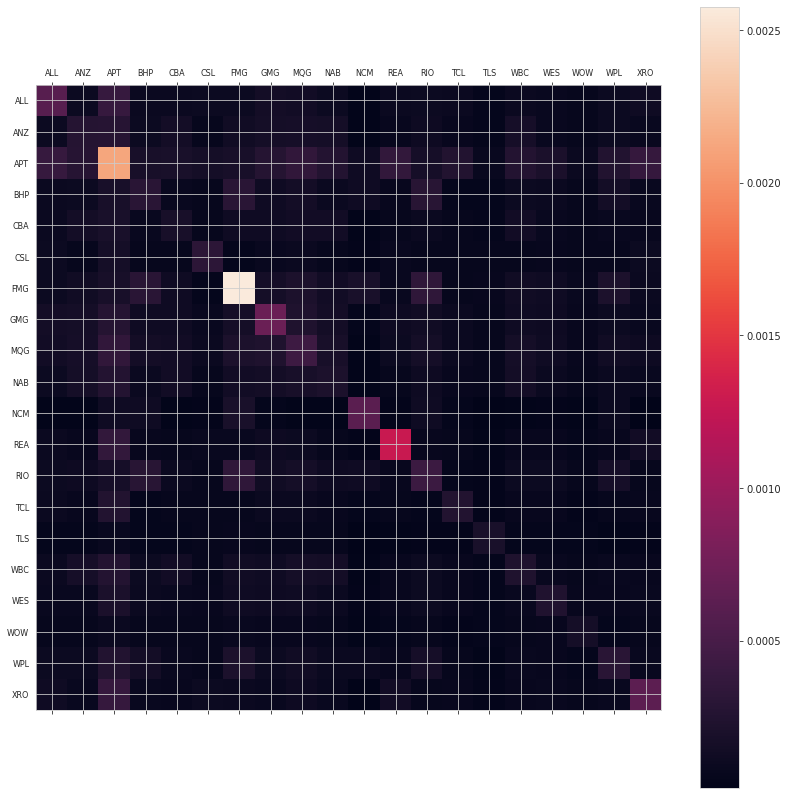

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.matshow(cov_matrix)
plt.colorbar()
x = ['ALL', 'ANZ', 'APT', 'BHP','CBA','CSL','FMG','GMG','MQG','NAB','NCM','REA','RIO','TCL', 'TLS', 'WBC','WES','WOW','WPL','XRO']
y = ['ALL', 'ANZ', 'APT', 'BHP','CBA','CSL','FMG','GMG','MQG','NAB','NCM','REA','RIO','TCL', 'TLS', 'WBC','WES','WOW','WPL','XRO']
plt.imshow(cov_matrix, interpolation='none')
plt.xticks(range(len(x)), x, fontsize=8)
plt.yticks(range(len(y)), y, fontsize=8)
plt.show()

#Correlation matrix of ASX20 Stocks

In [ ]:
corr_matrix = returns.apply(lambda x: np.log(1+x)).corr()

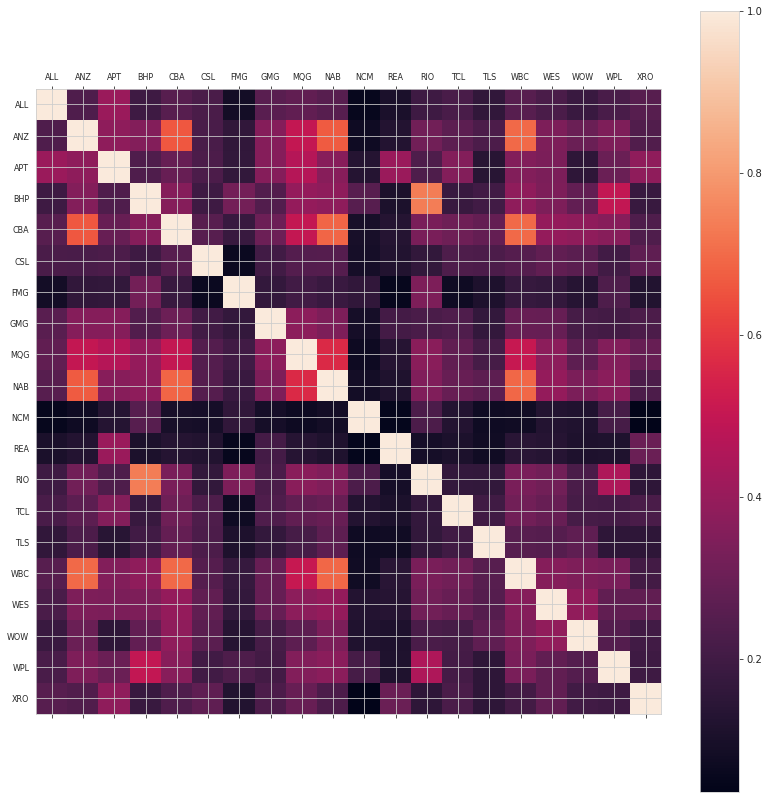

In [ ]:
plt.matshow(corr_matrix)
plt.colorbar()
x = ['ALL', 'ANZ', 'APT', 'BHP','CBA','CSL','FMG','GMG','MQG','NAB','NCM','REA','RIO','TCL', 'TLS', 'WBC','WES','WOW','WPL','XRO']
y = ['ALL', 'ANZ', 'APT', 'BHP','CBA','CSL','FMG','GMG','MQG','NAB','NCM','REA','RIO','TCL', 'TLS', 'WBC','WES','WOW','WPL','XRO']
plt.imshow(corr_matrix, interpolation='none')
plt.xticks(range(len(x)), x, fontsize=8)
plt.yticks(range(len(y)), y, fontsize=8)
plt.show()

In [ ]:
avgreturns = returns.mean()

#Average Returns of ASX20 Stocks in Descending Order

In [ ]:
sortedreturns= avgreturns.sort_values(ascending=False)
sortedreturns

APT.AX    0.004209
FMG.AX    0.002538
XRO.AX    0.001811
REA.AX    0.001503
CSL.AX    0.001000
ALL.AX    0.000935
NCM.AX    0.000731
MQG.AX    0.000649
WES.AX    0.000563
RIO.AX    0.000533
TCL.AX    0.000503
BHP.AX    0.000484
WPL.AX    0.000481
WOW.AX    0.000453
CBA.AX    0.000441
GMG.AX    0.000440
ANZ.AX    0.000387
NAB.AX    0.000339
WBC.AX    0.000317
TLS.AX    0.000150
dtype: float64

#Computing the 95% Confidence Interval Value at Risk (VaR) for the ASX20 Portfolio

In [ ]:
portfoliomean  = avgreturns.dot(weights)                           #Making the returns proportional with the weighting of our portfolio

In [ ]:
portfoliostd = np.sqrt(weights.T.dot(cov_matrix).dot(weights))     #Computing the standard deviation of our portfolio after adjusting for weights

In [ ]:
invmean        = (1+portfoliomean) * initinv                       #Computing the mean of our investment amount

In [ ]:
invstd         = initinv * portfoliostd                            #Computing the standard deviation of our investment

In [ ]:
from scipy.stats import norm

In [ ]:
conf95 = 0.05                                                       #Asserting the confidence interval at 95%

In [ ]:
confcutoff95 = norm.ppf(conf95, invmean, invstd)                      #Defining the "cutoff" value where our 95% CI sits

In [ ]:
var95 = initinv - confcutoff95                                        #Calculating the VaR as Initial Investment value minus the cutoff

In [ ]:
var95

18116.677306920523

**Interpretation of the above number:**


We can say with 95% confidence that an equally weighted portfolio of ASX20 securities will not lose more than AUD 18,116 for an investment of AUD1 million.

#Computing the 99% Confidence Interval Value at Risk for an ASX20 Portfolio

In [ ]:
conf99 =0.01

In [ ]:
confcutoff99 =norm.ppf(conf99, invmean, invstd)

In [ ]:
var99 = initinv - confcutoff99  

In [ ]:
var99

26005.3092369932

**Interpretation of the above number:**


We can say with 99% confidence that an equally weighted portfolio of ASX20 securities will not lose more than AUD 26005 for an investment of AUD 1 million.

#Monte Carlo Simulations for the ASX20 Portfolio

In [ ]:
log_returns = np.log(Close/Close.shift())                                             #Log returns of the 'Close' of the ASX20 Stocks

In [ ]:
n = 5000                                                                              #Running 5000 iterations for the simulation
 
weights1 = np.zeros((n, 20))
exp_rtns = np.zeros(n)                                                                #Expected Returns
exp_vols = np.zeros(n)                                                                #Expected Volatility
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(20)
    weight /= weight.sum()
    weights1[i] = weight
     
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

#Sharpe Ratios for our portfolio:

In [ ]:
sharpemax = weights1[sharpe_ratios.argmax()]
sharpemax

array([0.0924416 , 0.00104518, 0.10929503, 0.07583595, 0.04190053,
       0.00361241, 0.07601744, 0.00180211, 0.00816657, 0.04277823,
       0.10439617, 0.0380819 , 0.01557166, 0.00072694, 0.00026095,
       0.03540037, 0.13001162, 0.08024357, 0.03218683, 0.11022493])

**Interpretation of the above numbers:**

The above 20 numbers are the weights of our ASX securities which will maximise their Sharpe ratios.


#Visualising the Volatility versus Returns for our portfolio given 5000 simulations

Text(0, 0.5, 'Return')

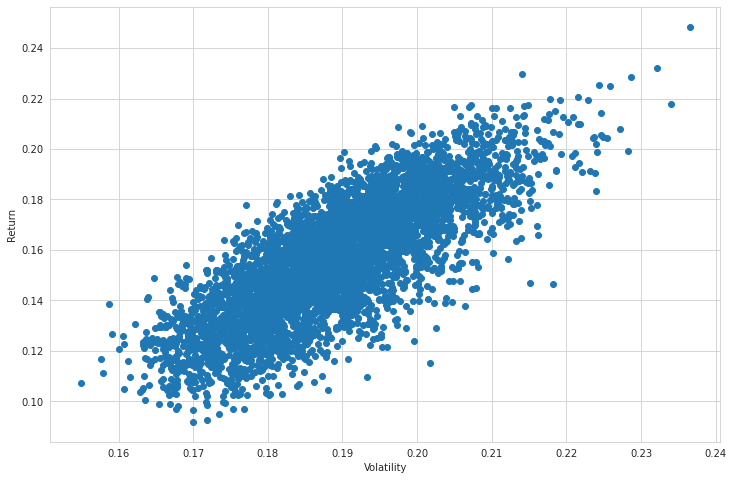

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(exp_vols,exp_rtns)
plt.xlabel('Volatility')
plt.ylabel('Return')